* Loading libraries

In [1]:
#loading libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split, KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import warnings
warnings.filterwarnings('ignore')

* Data Preprocessing

In [2]:
# reading the data
sales_c=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
sales=sales_c.copy()
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
#checking the null values
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [5]:
# replacing the null values by NaN values
sales.replace('',np.nan,regex=True)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [6]:
#checking the shape of the data
sales.shape

(14204, 12)

In [7]:
# checking the statistical analysis of numerical columns
sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* EDA 

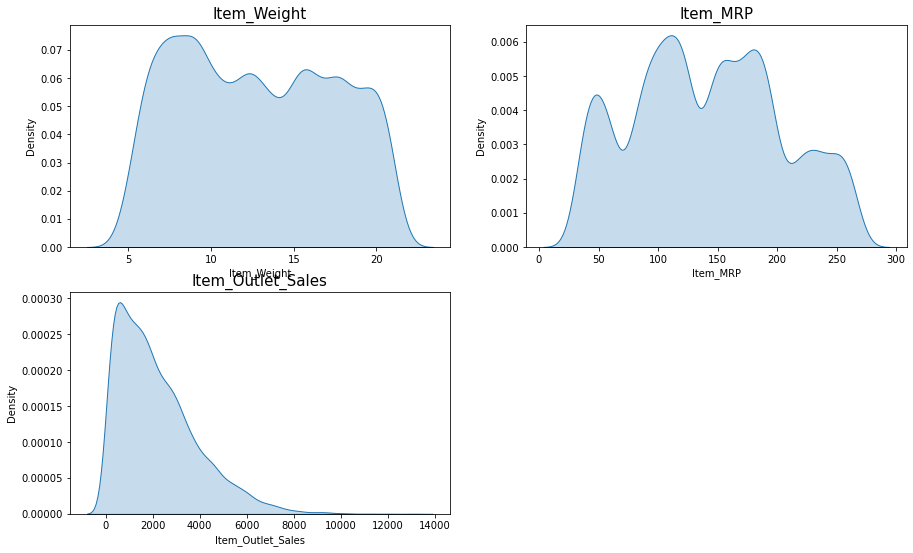

In [8]:
# sprading of continious data
lst=['Item_Weight','Item_MRP','Item_Outlet_Sales']
plt.figure(figsize=(15,9))
for i in range(0,len(lst)):
    plt.subplot(2,2,i+1)
    plt.title(lst[i],fontsize=15)
    sb.kdeplot(data=sales,x=lst[i],shade=True)
plt.show()

* 1. items weight are highly distributed between 5-10
* 2. items mrp ranges in between 0-300 and maximum items mrp lies in between 80- 210
* 3. item outlet sales are mostly lies in between 0-4000.

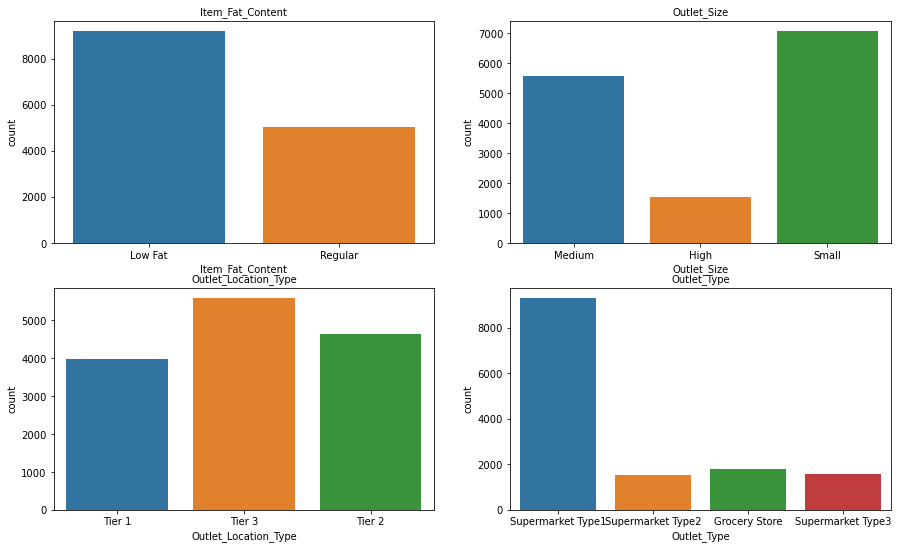

In [9]:
# counting of categorical data
lst1=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']
plt.figure(figsize=(15,9))
for i in range(0,len(lst1)):
    plt.subplot(2,2,i+1)
    plt.title(lst1[i],fontsize=10)
    sb.countplot(data=sales,x=lst1[i])
plt.show()

* 1. Most of the fat content are low in nature.
* 2. Most of the outlets are small in size.
* 3. Most of the loaction types are Tier 3.
* 4. Supermarkets are famous among all the outlet types.

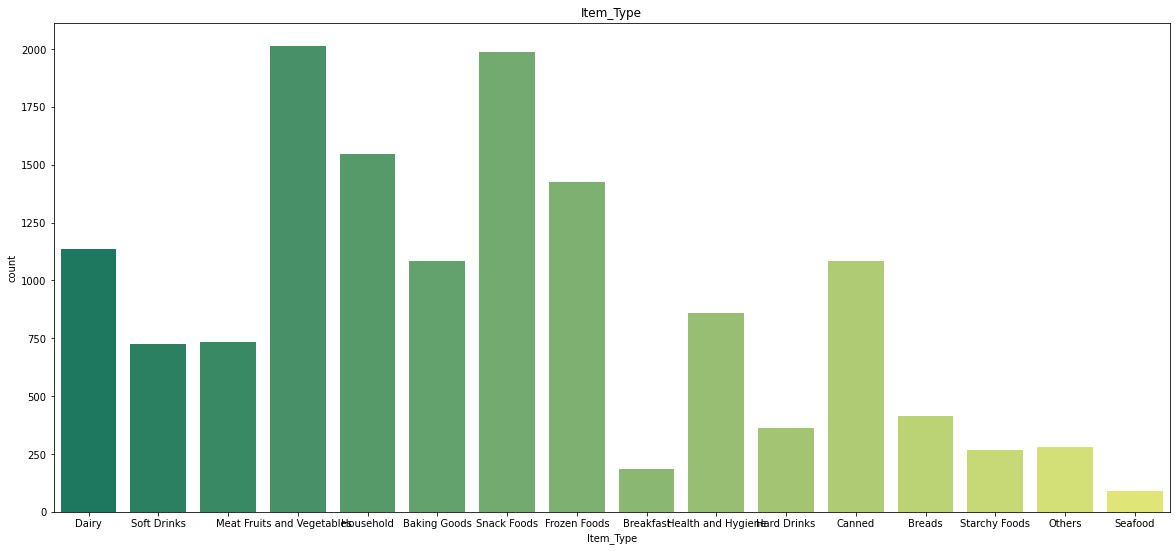

In [10]:
# count of item types
plt.figure(figsize=(20,9))
plt.title('Item_Type')
sb.countplot(data=sales,x='Item_Type',palette='summer');

* Fruits and vegitables are most available products followed by snacks.

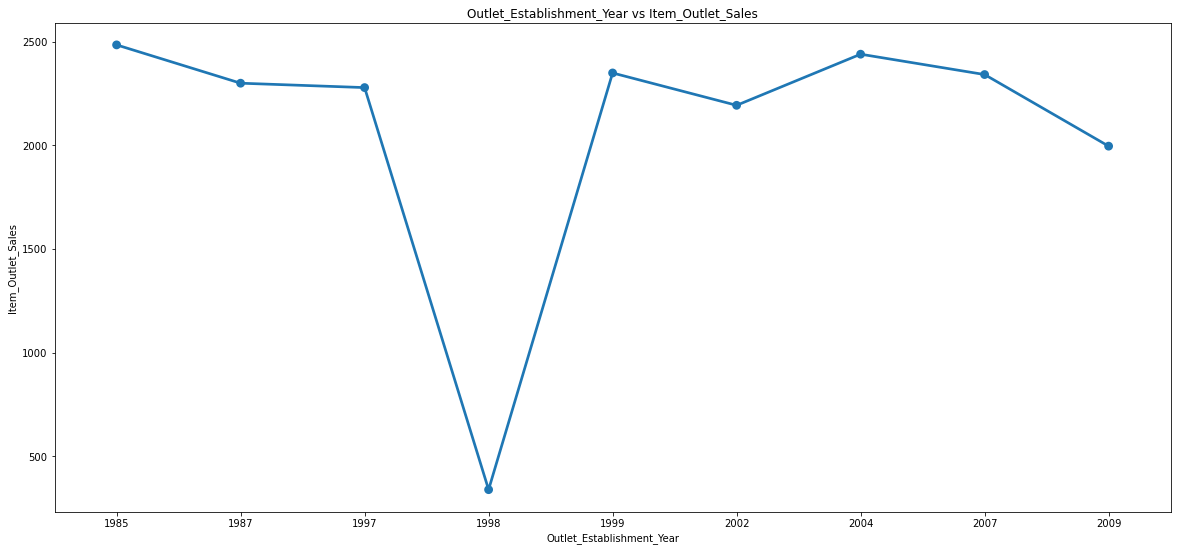

In [11]:
# Sales over the years of outlet opening
plt.figure(figsize=(20,9))
plt.title('Outlet_Establishment_Year vs Item_Outlet_Sales')
sb.pointplot(data=sales,x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ci=0);

* from 1985 to 1997 sale is decresing gradually but in 1998 sale decresed suddenly and again it rise up in 1999 and after that sales are incresing gradually

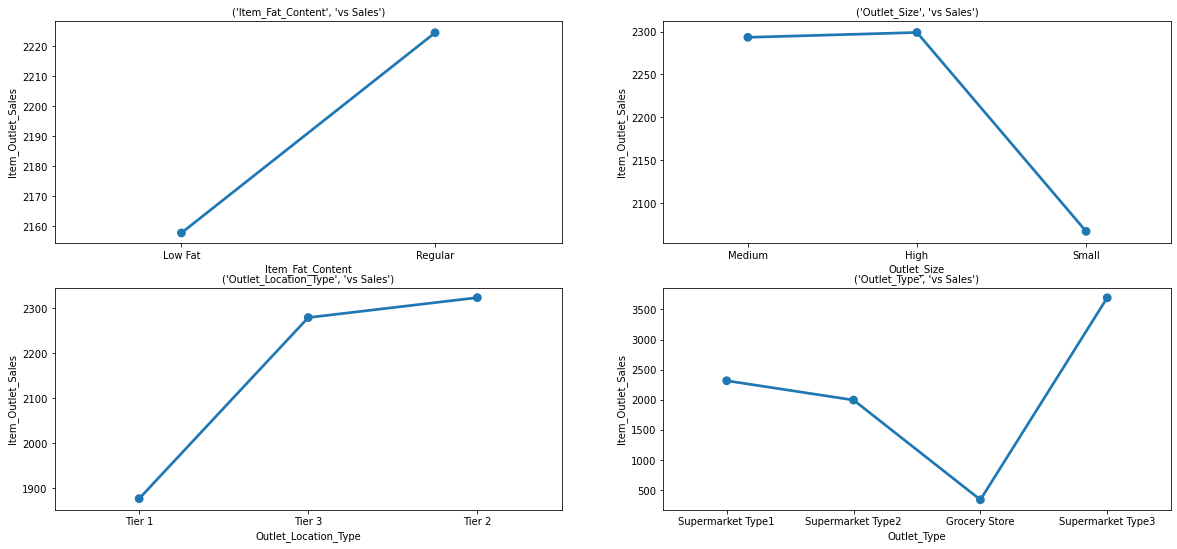

In [12]:
# categorical data wise sale
lst1=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type']
plt.figure(figsize=(20,9))
for i in range(0,len(lst1)):
    plt.subplot(2,2,i+1)
    plt.title((lst1[i],'vs Sales'),fontsize=10)
    sb.pointplot(data=sales,x=lst1[i],y='Item_Outlet_Sales',ci=0)
plt.show()

* 1. Regualr fats are more likely to purchased by customers.
* 2. At High outlet size stores sales are most likely happened. So increse more no of high outlet stores for more sales.
* 3. Tier 2 outlet locations are more popular among customers.So increase more no of stores their.
* 4. At supermarkets people are most likely to go foer shopping. So supermarkets are best choice to increase sale.

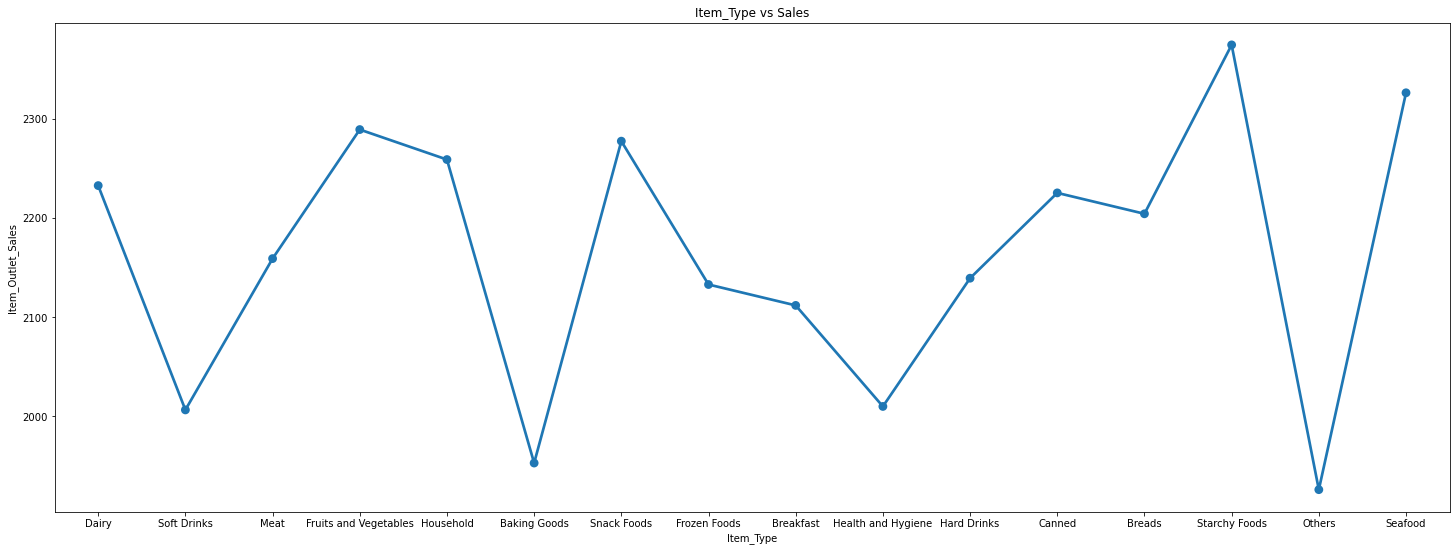

In [13]:
# Item types vs sales
plt.figure(figsize=(25,9))
plt.title('Item_Type vs Sales')
sb.pointplot(data=sales,x='Item_Type',y='Item_Outlet_Sales',ci=0);

* Most of the customer buys starchy foods & sea food over anything. So stock more no of starchy foods and seafoods.

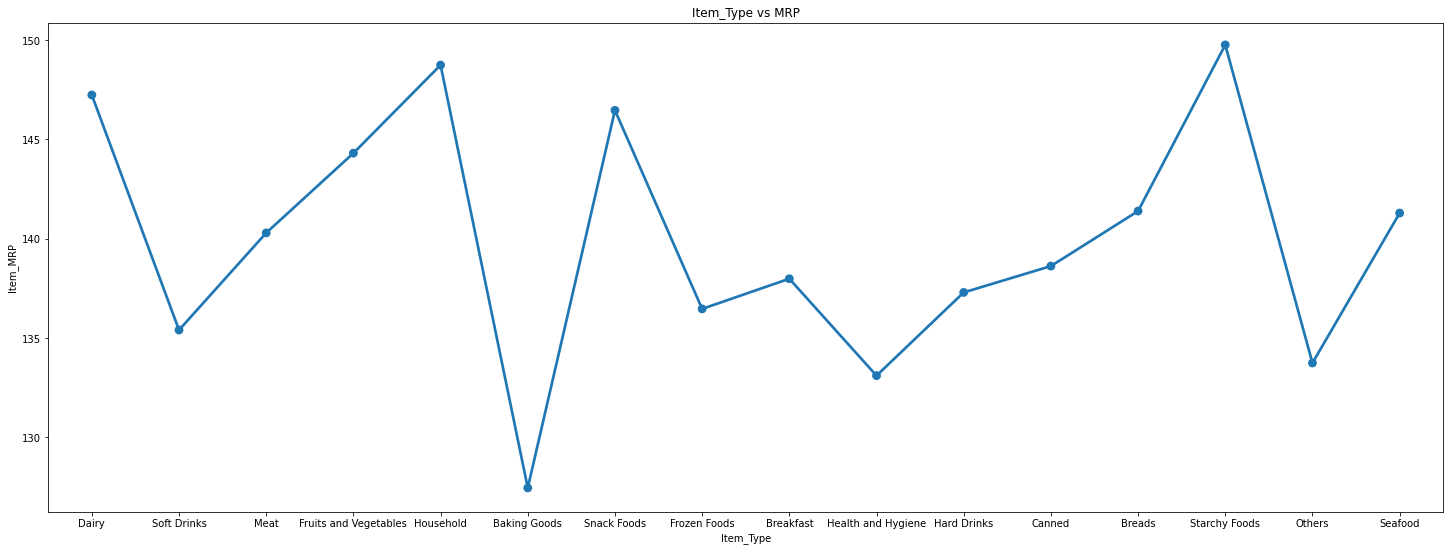

In [14]:
# price of items vs sales
plt.figure(figsize=(25,9))
plt.title('Item_Type vs MRP')
sb.pointplot(data=sales,x='Item_Type',y='Item_MRP',ci=0);

* Fruits & starchy foods are high in cost.

In [15]:
# Checking the total no of items present in categorical data
cat=sales.select_dtypes(exclude=[np.number])
for i in list(cat.columns):
    print(sales[i].value_counts())
    print(10*'=================')

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Small     7071
Medium    5580
High      1553
Name: 

In [16]:
# lable encode the categorical data to find the corelation among all of them
label_encoder=LabelEncoder()
for i in list(cat.columns):
    sales[i+'_encoder']=label_encoder.fit_transform(sales[i])
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoder,Item_Fat_Content_encoder,Item_Type_encoder,Outlet_Identifier_encoder,Outlet_Size_encoder,Outlet_Location_Type_encoder,Outlet_Type_encoder
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,3,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,9,1,0,1
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,0,1,2,0
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,1,0,2,1


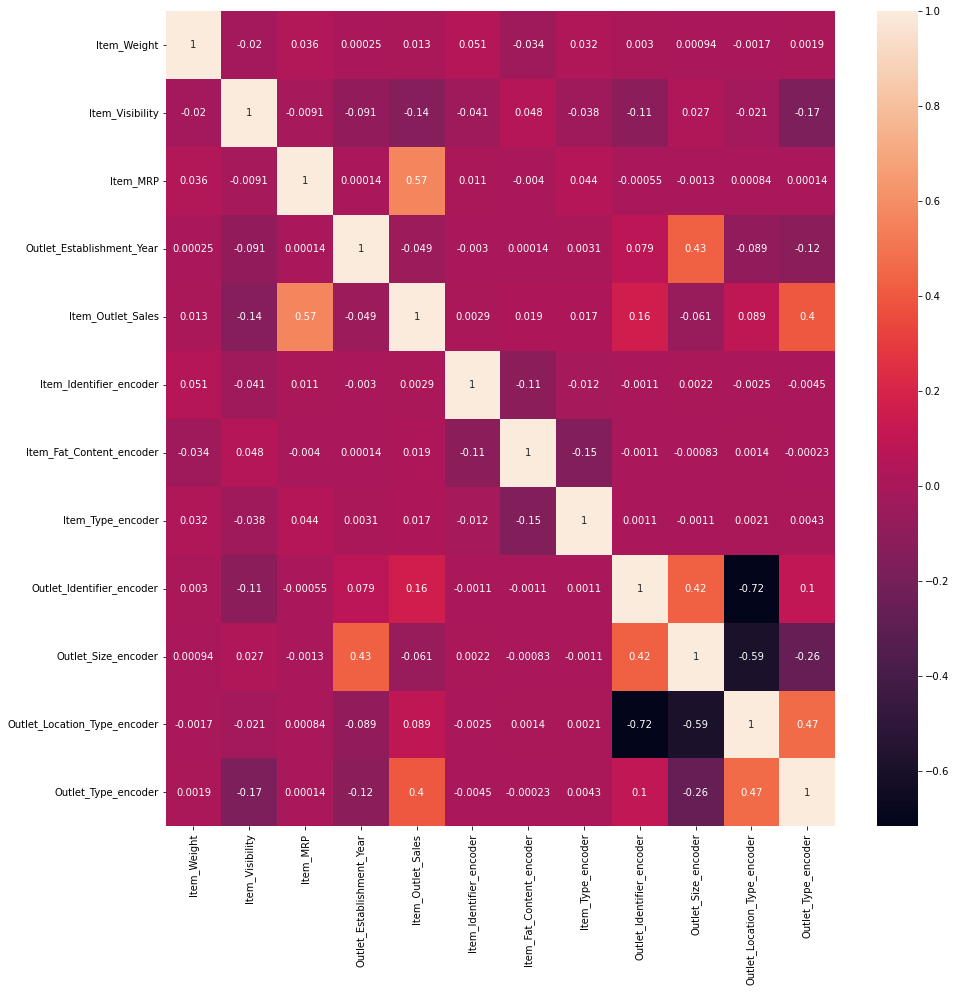

In [17]:
# corealtion among all the columns
corr=sales.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr,annot=True);

In [18]:
# selecting the numerical columns and dropping the unnecessary columns that have highly varied data compared to other for better scaling purpose.
sales_num=sales.select_dtypes(include=[np.number])
sales_num.drop(['Outlet_Establishment_Year','Item_Identifier_encoder','Outlet_Identifier_encoder','Item_Weight','Item_Fat_Content_encoder','Item_Type_encoder'],axis=1, inplace=True)
sales_num.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size_encoder,Outlet_Location_Type_encoder,Outlet_Type_encoder
0,0.016047,249.8092,3735.1380,1,0,1
1,0.019278,48.2692,443.4228,1,2,2
2,0.016760,141.6180,2097.2700,1,0,1
3,0.074402,182.0950,732.3800,1,2,0
4,0.064299,53.8614,994.7052,0,2,1


In [19]:
sales_num.shape

(14204, 6)

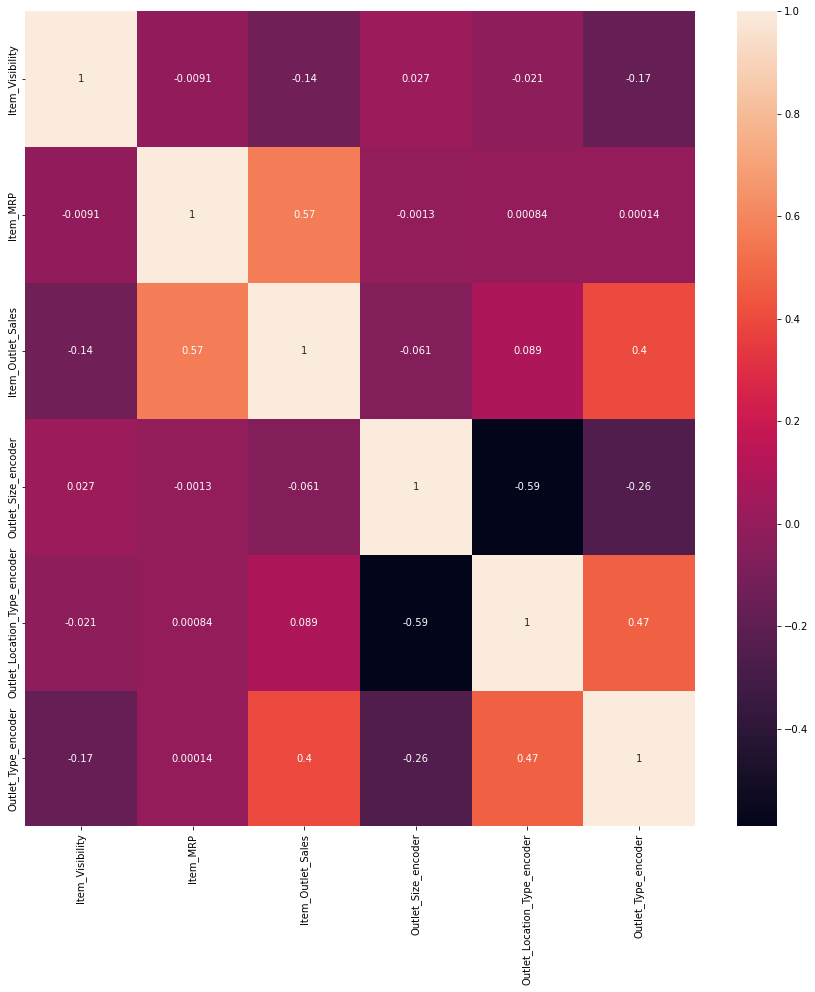

In [20]:
# corelation among all the columns
corr1=sales_num.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr1,annot=True);

In [21]:
# selecting the highly corelated data for further processing
lst2=['Item_MRP','Outlet_Type_encoder']
x=sales_num[lst2]
y=sales_num['Item_Outlet_Sales']

In [22]:
# seperating the nan value rows and taking rest of the values
x_c=x.head(8523)
x_n=x.tail(5681)     # nan values
y_c=y.head(8523)
y_n=y.tail(5681)     # nan values

In [23]:
# scaling and spliting the data
scale=MinMaxScaler()
x_train,x_test,y_train,y_test=train_test_split(x_c,y_c,test_size=0.3,random_state=1)
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

* Linear Regression 

In [24]:
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)
y_pred=model_lin.predict(x_test)
print('Acuuracy score : ',model_lin.score(x_test,y_test))

Acuuracy score :  0.4838314761269127


* Ridge regression by using CV

In [25]:
model_ridge=RidgeCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100])
model_ridge.fit(x_train,y_train)
model_ridge.alpha_        # getting the best alpha value for better accuracy

0.1

In [26]:
model_ridge=Ridge(alpha=0.1,random_state=1)
model_ridge.fit(x_train,y_train)
y_pred_ridge=model_ridge.predict(x_test)
print('Acuuracy: ', model_ridge.score(x_test,y_test))

Acuuracy:  0.4838370400311839


* Lasso regression by CV

In [27]:
model_lasso=LassoCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100])
model_lasso.fit(x_train,y_train)
model_lasso.alpha_          # getting the best alpha value for better accuracy

0.0001

In [28]:
model_lasso=Lasso(alpha=0.0001, random_state=1)
model_lasso.fit(x_train,y_train)
y_pred_lasso=model_lasso.predict(x_test)
print('Acuuracy: ', model_lasso.score(x_test,y_test))

Acuuracy:  0.48383148583456226


* Decision tree regressor

In [29]:
model_dtm1=DecisionTreeRegressor()

params_rf = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'max_leaf_nodes': [10,25,30,50,100,200]}
for i in range(2,10):
    grid_search = GridSearchCV(estimator=model_dtm1,param_grid=params_rf,cv =i ,n_jobs=-1, verbose=1, scoring="r2")
    grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 6 folds for each of 180 candidates, totalling 1080 fits
Fitting 7 folds for each of 180 candidates, totalling 1260 fits
Fitting 8 folds for each of 180 candidates, totalling 1440 fits
Fitting 9 folds for each of 180 candidates, totalling 1620 fits


In [30]:
grid_search.best_score_

0.5879517956398469

In [31]:
grid_search.best_estimator_                    # getting the best parameters for better accuracy

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=30, min_samples_leaf=50)

In [32]:
model_dtm=DecisionTreeRegressor(max_depth=10, max_leaf_nodes=30, min_samples_leaf=50)
model_dtm.fit(x_test,y_test)
print('Accuracy by hold out method : ', model_dtm.score(x_test,y_test))

Accuracy by hold out method :  0.6161009234503261


* Random Forest Bagging

In [33]:
model_rf=RandomForestRegressor()
params_rf = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'max_leaf_nodes': [10,25,30,50,100,200]}
for i in range(2,6):
    grid_search1 = GridSearchCV(estimator=model_rf,param_grid=params_rf,cv =i ,n_jobs=-1, verbose=1, scoring="r2")
    grid_search1.fit(x_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [34]:
grid_search1.best_score_

0.5982109172079001

In [35]:
grid_search1.best_estimator_           # getting the best parameters for better accuracy

RandomForestRegressor(max_depth=5, max_leaf_nodes=200, min_samples_leaf=20)

In [36]:
model_rf=RandomForestRegressor(max_depth=5, max_leaf_nodes=25, min_samples_leaf=20)
model_rf.fit(x_test,y_test)
print('Accuracy by hold out method : ', model_rf.score(x_test,y_test))

Accuracy by hold out method :  0.6204172197538671


* Adaboost Regressor

In [37]:
model_ada=AdaBoostRegressor()
params_rf = {'n_estimators': list(range(1,101))}
for i in range(2,6):
    grid_search2 = GridSearchCV(estimator=model_ada,param_grid=params_rf,cv =i ,n_jobs=-1, verbose=1, scoring="r2")
    grid_search2.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [38]:
grid_search2.best_score_

0.5583345047657264

In [39]:
grid_search2.best_estimator_         # getting the best parameters for better accuracy

AdaBoostRegressor(n_estimators=4)

In [40]:
model_ada=AdaBoostRegressor(n_estimators=4)
model_ada.fit(x_test,y_test)
print('Accuracy by hold out method : ', model_ada.score(x_test,y_test))

Accuracy by hold out method :  0.5858153241900736


In [41]:
# Creating Dataframe of all the model to compare better accuracy
tbl=pd.DataFrame()
tbl['Model']=pd.Series(['Linear','Ridge','Lasso','Decision Tree','Random forest','Ada boost'])
tbl['Accuracy( Before dropping null values)']=pd.Series([model_lin.score(x_test,y_test),model_ridge.score(x_test,y_test),model_lasso.score(x_test,y_test),model_dtm.score(x_test,y_test),model_rf.score(x_test,y_test),model_ada.score(x_test,y_test)])
tbl.set_index('Model')

,Accuracy( Before dropping null values)
Model,
Linear,0.483831
Ridge,0.483837
Lasso,0.483831
Decision Tree,0.616101
Random forest,0.620417
Ada boost,0.585815


* Here in Random forest regressor model the accuracy is coming higher compared to other model's accuracy. So we can follow the Random Forest Regressor to build a better model on this dataset

In [43]:
# predicting the nan values
n_val_pred=model_rf.predict(x_n)
n_val_pred

array([6386.83084199, 6386.83084199,  632.45062154, ..., 6386.83084199,
       6386.83084199, 6386.83084199])

In [44]:
# creating searies of the predicted values
sale_n=pd.Series(n_val_pred,index=y_n.index)
sale_n

8523     6386.830842
8524     6386.830842
8525      632.450622
8526     6386.830842
8527     6386.830842
            ...     
14199    6386.830842
14200    6386.830842
14201    6386.830842
14202    6386.830842
14203    6386.830842
Length: 5681, dtype: float64

* After filling the null values by predicted values

In [45]:
# filling the null values with predicted values
sales['Item_Outlet_Sales'].fillna(sale_n,inplace=True)
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoder,Item_Fat_Content_encoder,Item_Type_encoder,Outlet_Identifier_encoder,Outlet_Size_encoder,Outlet_Location_Type_encoder,Outlet_Type_encoder
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,3,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,9,1,0,1
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,0,1,2,0
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,1,0,2,1


In [46]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Identifier_encoder         0
Item_Fat_Content_encoder        0
Item_Type_encoder               0
Outlet_Identifier_encoder       0
Outlet_Size_encoder             0
Outlet_Location_Type_encoder    0
Outlet_Type_encoder             0
dtype: int64

In [47]:
#lable encoding the categorical columns
label_encoder=LabelEncoder()
for i in list(cat.columns):
    sales[i+'_encoder']=label_encoder.fit_transform(sales[i])
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Identifier_encoder,Item_Fat_Content_encoder,Item_Type_encoder,Outlet_Identifier_encoder,Outlet_Size_encoder,Outlet_Location_Type_encoder,Outlet_Type_encoder
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,156,0,4,9,1,0,1
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,8,1,14,3,1,2,2
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,662,0,10,9,1,0,1
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,1121,1,6,0,1,2,0
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1297,0,9,1,0,2,1


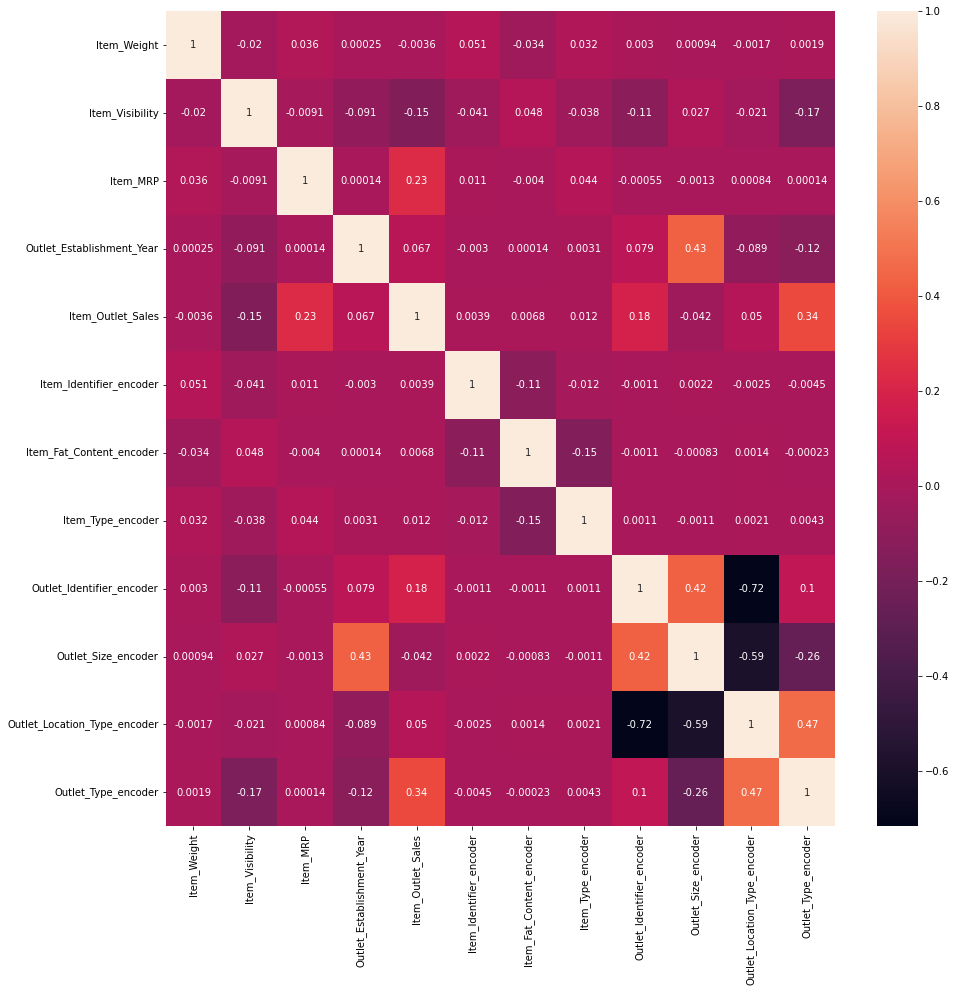

In [48]:
# corelation among all the columns
corr=sales.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr,annot=True);

In [49]:
# selecting the numerical columns and dropping the unnecessary columns that have highly varied data compared to other for better scaling purpose.

sales_num1=sales.select_dtypes(include=[np.number])
sales_num1.drop(['Outlet_Establishment_Year','Item_Identifier_encoder','Outlet_Identifier_encoder','Item_Weight','Item_Fat_Content_encoder','Item_Type_encoder'],axis=1, inplace=True)
sales_num1.head()

,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Size_encoder,Outlet_Location_Type_encoder,Outlet_Type_encoder
0,0.016047,249.8092,3735.1380,1,0,1
1,0.019278,48.2692,443.4228,1,2,2
2,0.016760,141.6180,2097.2700,1,0,1
3,0.074402,182.0950,732.3800,1,2,0
4,0.064299,53.8614,994.7052,0,2,1


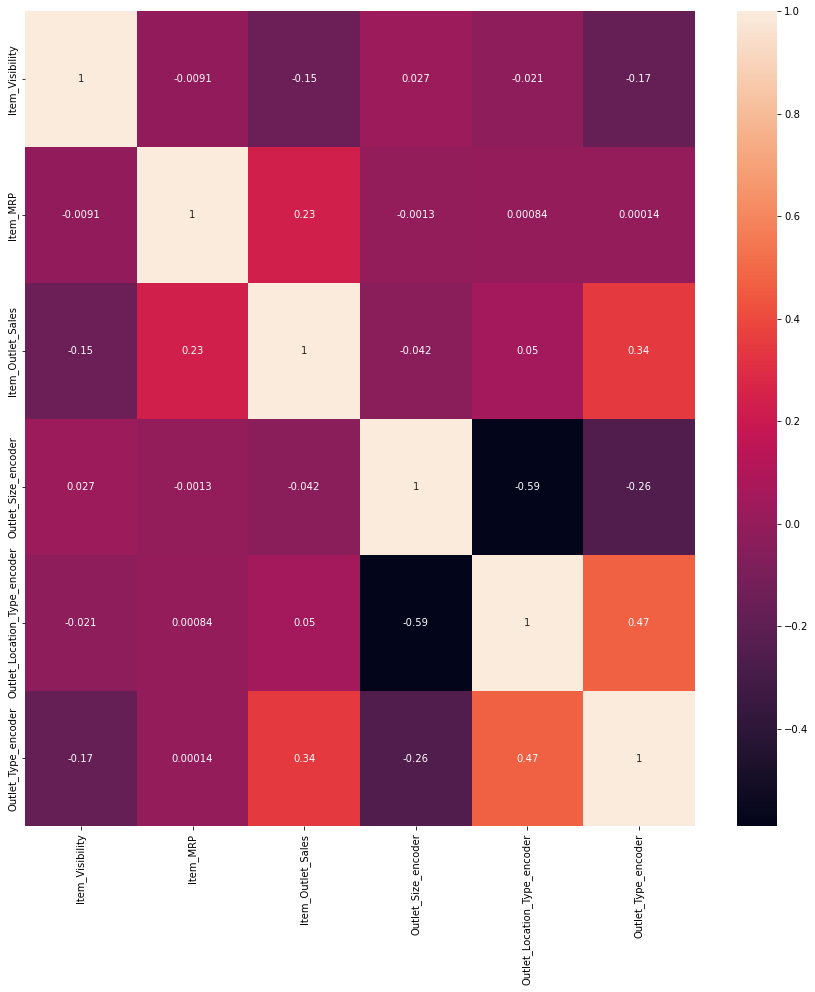

In [50]:
# corelation among all the columns
corr=sales_num1.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr,annot=True);

In [51]:
# selecting the highly corelated data for further processing
lst2=['Item_MRP','Outlet_Type_encoder']
x=sales_num1[lst2]
y=sales_num1['Item_Outlet_Sales']

In [52]:
# scaling and spliting the data
scale=MinMaxScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

* Random Forest Regressor using Gridsearch CV

In [53]:
model_raf=RandomForestRegressor()
params_raf = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'max_leaf_nodes': [10,25,30,50,100,200]}
for i in range(2,6):
    grid_search1 = GridSearchCV(estimator=model_raf,param_grid=params_raf,cv =i ,n_jobs=-1, verbose=1, scoring="r2")
    grid_search1.fit(x_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [54]:
grid_search1.best_score_

0.3029094009227898

In [55]:
grid_search1.best_estimator_              # getting the best parameters for better accuracy

RandomForestRegressor(max_depth=5, max_leaf_nodes=10, min_samples_leaf=10)

In [56]:
model_raf=RandomForestRegressor(max_depth=5, max_leaf_nodes=10, min_samples_leaf=10)
model_raf.fit(x_test,y_test)
print('Accuracy by hold out method : ', model_raf.score(x_test,y_test))

Accuracy by hold out method :  0.3135600156599515


* Decision Tree Regressor using Grid search CV

In [57]:
model_dtm2=DecisionTreeRegressor()

params_rf = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'max_leaf_nodes': [10,25,30,50,100,200]}
for i in range(2,10):
    grid_search = GridSearchCV(estimator=model_dtm2,param_grid=params_rf,cv =i ,n_jobs=-1, verbose=1, scoring="r2")
    grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Fitting 6 folds for each of 180 candidates, totalling 1080 fits
Fitting 7 folds for each of 180 candidates, totalling 1260 fits
Fitting 8 folds for each of 180 candidates, totalling 1440 fits
Fitting 9 folds for each of 180 candidates, totalling 1620 fits


In [58]:
grid_search.best_score_

0.2993393615252328

In [59]:
grid_search.best_estimator_               # getting the best parameters for better accuracy

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, min_samples_leaf=200)

In [60]:
model_dtm2=DecisionTreeRegressor(max_depth=5, max_leaf_nodes=10, min_samples_leaf=200)
model_dtm2.fit(x_test,y_test)
print('Accuracy by hold out method : ', model_dtm2.score(x_test,y_test))

Accuracy by hold out method :  0.29778862922151794


* Linear Regression

In [61]:
model_line=LinearRegression()
model_line.fit(x_train,y_train)
y_pred=model_line.predict(x_test)
print('Acuuracy score : ',model_line.score(x_test,y_test))

Acuuracy score :  0.16582732932247346


* Ridge regression Using CV

In [62]:
model_ridge1=RidgeCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100])
model_ridge1.fit(x_train,y_train)
model_ridge1.alpha_                    # getting the best alpha value for better accuracy

1.0

In [63]:
model_ridge1=Ridge(alpha=1,random_state=1)
model_ridge1.fit(x_train,y_train)
y_pred_ridge=model_ridge1.predict(x_test)
print('Acuuracy: ', model_ridge1.score(x_test,y_test))

Acuuracy:  0.16584601850716552


* Lasso Regresson using CV

In [64]:
model_lasso1=LassoCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100])
model_lasso1.fit(x_train,y_train)
model_lasso1.alpha_                      # getting the best alpha value for better accuracy

0.0001

In [65]:
model_lasso1=Lasso(alpha=0.0001, random_state=1)
model_lasso1.fit(x_train,y_train)
y_pred_lasso=model_lasso1.predict(x_test)
print('Acuuracy: ', model_lasso1.score(x_test,y_test))

Acuuracy:  0.16582733618268908


* Adaboost Regressor using Grid search CV

In [66]:
model_ada1=AdaBoostRegressor()
params_rf = {'n_estimators': list(range(1,101))}
for i in range(2,6):
    grid_search2 = GridSearchCV(estimator=model_ada1,param_grid=params_rf,cv =i ,n_jobs=-1, verbose=1, scoring="r2")
    grid_search2.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 4 folds for each of 100 candidates, totalling 400 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [67]:
grid_search2.best_score_

0.29401757115667804

In [68]:
grid_search2.best_estimator_                    # getting the best parameters for better accuracy

AdaBoostRegressor(n_estimators=3)

In [69]:
model_ada1=AdaBoostRegressor(n_estimators=3)
model_ada1.fit(x_test,y_test)
print('Accuracy by hold out method : ', model_ada1.score(x_test,y_test))

Accuracy by hold out method :  0.2974093477458776


In [70]:
# Creating dataframe of models after filling null values
tbl1=pd.DataFrame()
tbl1['Model']=pd.Series(['Linear','Ridge','Lasso','Decision Tree','Random forest','Ada boost'])
tbl1['Accuracy( After filling null values)']=pd.Series([model_line.score(x_test,y_test),model_ridge1.score(x_test,y_test),model_lasso1.score(x_test,y_test),model_dtm2.score(x_test,y_test),model_raf.score(x_test,y_test),model_ada1.score(x_test,y_test)])
tbl1.set_index('Model')

,Accuracy( After filling null values)
Model,
Linear,0.165827
Ridge,0.165846
Lasso,0.165827
Decision Tree,0.297789
Random forest,0.313560
Ada boost,0.297409


* After filling the null values we can see that the accuracy of all models decresed a lot. Among them the accuracy of Random forest algorithm is the best.So we can follow the model for better accuracy.

In [71]:
tbl.set_index('Model')

,Accuracy( Before dropping null values)
Model,
Linear,0.483831
Ridge,0.483837
Lasso,0.483831
Decision Tree,0.616101
Random forest,0.620417
Ada boost,0.585815


### 1. If we droping those null values from the main dataset then according to accuracy Random Forest Regrresor model will be the best among all the Regresson models.
### 2. If we filling the null values by predicted values then also according to accuracy Random Forest Regrresor model will be the best among all the Regresson models.

# So we can consider the Random forest regressor model in both the cases. It is the best model to predict the further datas of this dataset given to it.

### Recomendation:

* 1. Regualr fats are more likely to purchased by customers.So increse more no of regular fats in stock as currently in store there are more no of low fat content present.
* 2. At High outlet size stores sales are most likely happened. So increse more no of high outlet stores for more sales as currently there are more no of small outlets are present.
* 3. Tier 2 outlet locations are more popular among customers.So increase more no of stores their as currently there are more no of outlets in Tier 3 location.
* 4. At supermarkets people are most likely to go foer shopping. So supermarkets are best choice to increase sale.Open more no of of shops in various supermarkets.
* 5. Most of the customer buys starchy foods & sea food over anything. So stock more no of starchy foods and seafoods.And you can also give a little discount on those as they are more likely to available in the shop.